# <center>Gaussian normal equation</center>
## <center>Linear regression</center>

For 14 days we are measuring our 5km running results in sec. Furthermore, on every 7 days we run an extra 5km. We would like to use linear regression on the data. What will our modell predict for the 15th day?
<table>
 <tr>
<td>t_i (Days) | 1| 2 | 3 | 4 | 5 | 6 | 7 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 14 | 15</td>
  </tr>
  <br>
  <tr>
    <td>f_i (sec)| 1528 | 1504 | 1488 | 1432 | 1528 | 1392 | 1368| 1392 | 1320 | 1316 | 1388 | 1288 | 1352 | 1232 | 1200 | 1244 | ?     </td>
  </tr>
    </table>

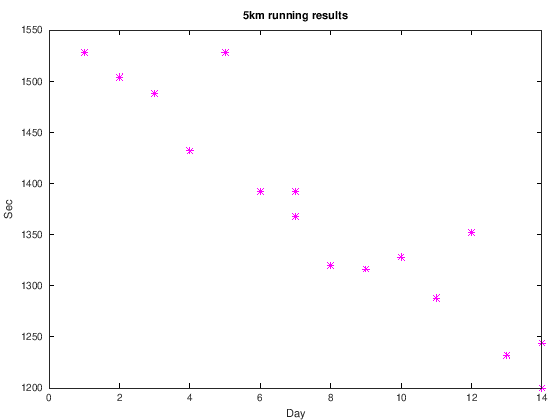

In [1]:
t = [1:7 7 8:14 14 ];
f = [1528 1504 1488 1432 1528 1392 1368 1392 1320 1316 1328 1288 1352 1232 1200 1244];
plot(t,f, 'm*')
title('5km running results')
xlabel('Day')
ylabel('Sec')

In [2]:
M = [length(t) sum(t); sum(t) sum(t.^2)]
b = [sum(f) t*f']'

x = M\b

%% The prediction fot the 15th day
predicted_value = x(1)+x(2)*15

M =

     16    126
    126   1260

b =

    21912
   166348

x =

   1552.118
    -23.190

predicted_value =  1204.3


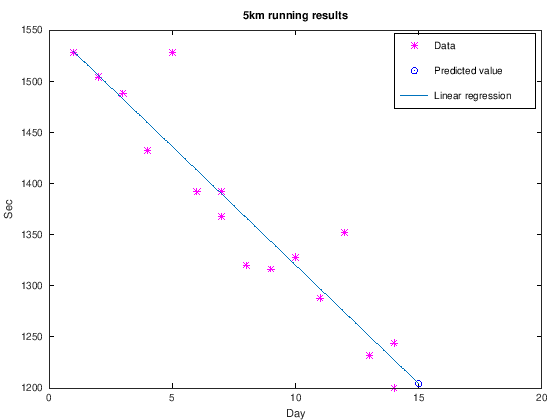

In [4]:
% Data, predicted value and the linear regression on the same figure
fine_t = linspace(1,15,100);

plot(t,f, 'm*')
hold on
plot(15,predicted_value,'bo')
plot(fine_t, x(1)+x(2)*fine_t)
title('5km running results')
xlabel('Day')
ylabel('Sec')
legend('Data', 'Predicted value', 'Linear regression')


## <center>Polinomial model</center>

In [5]:
format long
A_2 = [ones(length(t),1) t' (t.^2)'];
A_3 = [ones(length(t),1) t' (t.^2)' (t.^3)'];

%% The Gaussian normal equation A^T*A*x=A^T*f
x_2 = (A_2'*A_2)\(A_2'*f')
x_3 = (A_3'*A_3)\(A_3'*f')

x_2 =

   1.55959681697613e+03
  -2.58211022693785e+01
   1.68182392320349e-01

x_3 =

   1.55830821289129e+03
  -2.49522204717216e+01
   3.03249733347429e-02
   6.01182729410795e-03



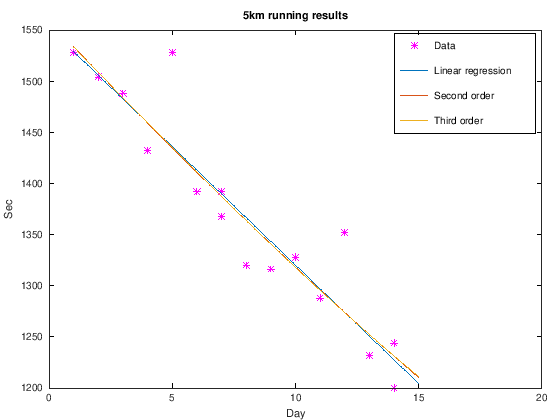

In [7]:
% Data, predicted value and the linear regression on the same figure
plot(t,f, 'm*')
hold on
plot(fine_t, x(1)+x(2)*finom_t) % Linear regression
plot(fine_t, x_2(1)+x_2(2)*(fine_t)+x_2(3)*(fine_t).^2) % Second order
plot(fine_t, x_3(1)+x_3(2)*(fine_t)+x_3(3)*(fine_t).^2+x_3(4)*(fine_t).^3) % Third order
title('5km running results')
xlabel('Day')
ylabel('Sec')
legend('Data', 'Linear regression','Second order', 'Third order')

In [8]:
% Predicted values
lin_reg = predicted_value
second_order = x_2(1)+x_2(2)*(fine_t(end))+x_2(3)*(fine_t(end)).^2
third_order = x_3(1)+x_3(2)*(fine_t(end))+x_3(3)*(fine_t(end)).^2+x_3(4)*(fine_t(end)).^3


lin_reg =  1204.27450980392
second_order =  1210.12132120753
third_order =  1211.13794193340


Relevant example: 

+ <a href="https://www.youtube.com/watch?v=njKP3FqW3Sk&t=2834s" target="_blank">Fitting</a>

<br><br><br>

## <center>Trigonometric model</center>



<b>Example 1.</b> Determine the coefficients of the model

<br>
$$F(t)=x_1+x_2\cos(\pi t)+x_3\sin(\pi t)$$
<br>
in the least square sense for the data
<br>

<table>
 <tr>
<td>t_i | 0| 0.5 | 1 | 1.5 | 2 | 2.5</td>
  </tr>
  <br>
  <tr>
    <td>f_i | 1 | -2 | -2.5 | -0.5 | 1.25 | -1.5     </td>
  </tr>
    </table>

A =

   1.00000   1.00000   0.00000
   1.00000   0.00000   1.00000
   1.00000  -1.00000   0.00000
   1.00000  -0.00000  -1.00000
   1.00000   1.00000  -0.00000
   1.00000   0.00000   1.00000

A_rank =  3
x =

  -0.90625
   1.88542
  -0.69792



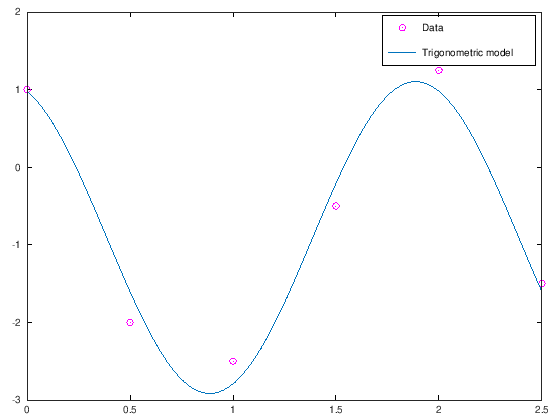

In [9]:
format
t = [0 0.5 1 1.5 2 2.5];
f = [1 -2 -2.5 -0.5 1.25 -1.5];

A = [ones(length(t),1) cos(pi*t)' sin(pi*t)']
A_rank = rank(A)
x = (A'*A)\(A'*f')

tt = linspace(0,2.5,100);
plot(t,f,'mo',tt,x(1)+x(2)*cos(pi*tt)+x(3)*sin(pi*tt))
legend('Data','Trigonometric model')

<b>Example 2.</b> Determine the coefficients of the model

<br>
$$F(t)=x_1+x_2\cos(\pi t)+x_3\sin(\pi t)$$
<br>
in the least square sense for the data
<br>

<table>
 <tr>
<td>t_i | 0| 0.5 | 2 | 2.5</td>
  </tr>
  <br>
  <tr>
    <td>f_i | 1 | -2 | 1.25 | -1.5     </td>
  </tr>
    </table>

A =

   1.000000000000000   1.000000000000000   0.000000000000000
   1.000000000000000   0.000000000000000   1.000000000000000
   1.000000000000000   1.000000000000000  -0.000000000000000
   1.000000000000000   0.000000000000000   1.000000000000000

A_rank =  2
A =

   1.00000000000000e+00   1.00000000000000e+00
   1.00000000000000e+00   6.12323399573677e-17
   1.00000000000000e+00   1.00000000000000e+00
   1.00000000000000e+00   3.06161699786838e-16

x =

  -1.75000000000000
   2.87500000000000



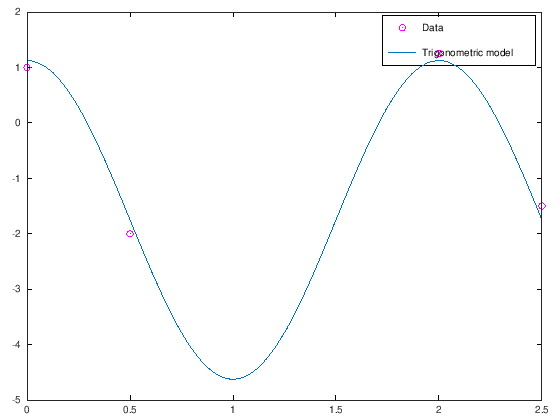

In [10]:
format long
t = [0 0.5 2 2.5];
f = [1 -2 1.25 -1.5];

A = [ones(length(t),1) cos(pi*t)' sin(pi*t)']
A_rank = rank(A) % It is not the maximal one

A = [ones(length(t),1) cos(pi*t)']
x = (A'*A)\(A'*f')

tt = linspace(0,2.5,100);
plot(t,f,'mo',tt,x(1)+x(2)*cos(pi*tt))
legend('Data','Trigonometric model')